In [1]:
%matplotlib inline

(chap-simulation)=
# Aufgabe 12: Zeckenstich Simulation

## Theorie

Jetzt wo ihr *for loops* im Griff habt, nutzen wir dieses Instrument, um unsere eigenen Zeckenstichdaten zu Simulieren. Das heisst, wir generieren fiktive Zeckenstiche auf der Basis der Zeckenstichmeldungen in `zeckenstiche.csv` (siehe {numref}`table-datensaetze`). Es geht jetzt darum, das zufällige Verschieben der Zeckenstichpunkte nicht nur einmal durchzuführen wie in {ref}`ex-apply`, sondern diesen Prozess 5 mal mithilfe eines *loops* zu wiederholen.

Um euer Gedächtnis etwas aufzufrischen: Letzte Woche hatten wir in {ref}`ex-apply` mit `apply()` sowie unserer Funktion `offset_coordinate` alle Koordinaten einer *DataFrame* verschoben und diese Simulierten Daten in unserer *DataFrame* abgespeichert. Schau dir diese Übung und die Musterlösung nochmals an wenn du sie nicht mehr ganz im Kopf hast.

Starte mit einem neuen Jupyter Notebook und lade darin die nötigen Module (`pandas` und `random`), erstellt euch die Funktion `offset_point()` und importiert den Datensatz `zeckenstiche.csv` (s.u.).

In [2]:
import pandas as pd

def offset_coordinate(old, distance = 100):
    import random
    new = old + random.normalvariate(0,distance)
    return(new)

zeckenstiche = pd.read_csv("data/zeckenstiche.csv")


## Übungen 

### Übung 12.1

Nutze nun dein Wissen über Loops, um den Schritt in {ref}`ex-apply` nicht nur einmal, sondern 5 mal durchzuführen. Kümmere dich zu diesem Zeitpunkt noch nicht um das Abspeichern des Outputs, es reicht wenn die Simulation 5x durchgeführt wird.

In [3]:
# Musterlösung

for i in range(5):
    zeckenstiche["x_sim"] = zeckenstiche["x"].apply(offset_coordinate)
    zeckenstiche["y_sim"] = zeckenstiche["y"].apply(offset_coordinate)

(ex-monte-carlo-loop)=
### Übung 12.2

Nun wollen wir dafür sorgen, dass die simulierten Daten aus der letzten Übung auch irgendwo abgespeichert werden. Sorge dafür, dass der Output in einer Liste mit dem Namen `monte_carlo` gespeichert wird.


```{tip}
:class: dropdown

Nutze hier die Anweisungen aus {ref}`forloops-2` respektive {ref}`ex-loopoutput`.
```


In [4]:
# Musterlösung

monte_carlo = []
for i in range(5):
    zeckenstiche["x_sim"] = zeckenstiche["x"].apply(offset_coordinate)
    zeckenstiche["y_sim"] = zeckenstiche["y"].apply(offset_coordinate)
    monte_carlo.append(zeckenstiche)

### Übung 12.3

Schau dir `monte_carlo` an. Wenn du alles richtig gemacht hast, sollte `monte_carlo` eine Liste bestehend aus 5 *DataFrames* sein. Überprüfe dies mit `type(monte_carlo)`, `len(monte_carlo)` und `type(monte_carlo[0])`. Vergleiche auch die *DataFrames* selbst: Fällt dir etwas auf?

In [5]:
type(monte_carlo)    # Was für ein Datentyp hat "monte_carlo"?
len(monte_carlo)     # Wie viele Elemente hat "monte_carlo"?
type(monte_carlo[0]) # Was haben diese Elemente für Datentypen?

monte_carlo[0].head(2) # Vergleiche die ersten beiden Zeilen von der ersten DataFrame...
monte_carlo[1].head(2) # ...mit den den ersten beiden Zeilen der zweiten DataFrame

,ID,accuracy,x,y,x_sim,y_sim
0,2550,439.128951,2681116,1250648,2.681173e+06,1.250683e+06
1,10437,301.748542,2681092,1250672,2.681253e+06,1.250701e+06


### Übung 12.4

Scharfen Beobachtern mag aufgefallen sein, dass die simulierten Koordinaten zwischen allen DataFrames identisch sind. Dieses Verhalten hat auch mich sehr verwirrt, siehe dazu [meine Frage auf Stackoverflow](https://stackoverflow.com/q/63800734/4139249). Es geht über den Umfang dieses Kurses hinaus die Gründe für dieses Verhalten zu erläutern.

Wichtig ist an dieser Stelle vor allem, dass wir das Problem der identischen Zufallsvariablen lösen, dafür braucht ihr `copy`. Im nachstehenden Code demonstriere ich `.copy` an meiner Implementation des *for loops*.

In [6]:
monte_carlo = []
for i in range(5):
    zeckenstiche["x_sim"] = zeckenstiche["x"].apply(offset_coordinate)
    zeckenstiche["y_sim"] = zeckenstiche["y"].apply(offset_coordinate)
    monte_carlo.append(zeckenstiche.copy()) 
    #                               \____/ hier liegt die Lösung des
    #                                      beschriebenen Problems

### Übung 12.5

Zu einem späteren Zeitpunkt werden wir wissen wollen, welcher simulierte Zeckenstich zu welcher Iteration gehört. Speichere die "Laufnummer" der Iteration (`i` in meinem Beispiel) als Spalte des *DataFrames*.

In [7]:
# Musterlösung

monte_carlo = []
for i in range(5):
    zeckenstiche["x_sim"] = zeckenstiche["x"].apply(offset_coordinate)
    zeckenstiche["y_sim"] = zeckenstiche["y"].apply(offset_coordinate)
    zeckenstiche["Run"] = i # <- speichert die "Run-Nummer"
    monte_carlo.append(zeckenstiche.copy())

### Übung 12.6

Wir können die simulierten Daten auch mit einem *For Loop* in einem Plot darstellen. Nutze den folgenden Code, um deine Daten zu visualisieren.

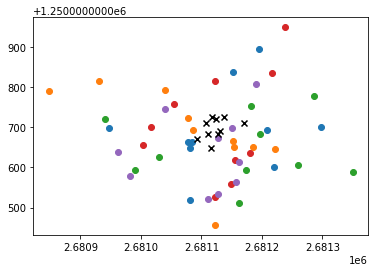

In [8]:
from matplotlib import pyplot as plt

for simulation in monte_carlo:
    plt.scatter(simulation["x_sim"],simulation["y_sim"])
    
plt.scatter(zeckenstiche["x"], zeckenstiche["y"], color = "black", marker = "x")

### Übung 12.7

Wie erläutert ist `monte_carlo` eine Liste bestehend aus 5 *DataFrames* mit jeweils den gleichen Spaltennamen. Um aus diesen 5 *DataFrames* mit je 10 Zeilen eine einzelne *DataFrame* mit 50 Zeilen zu machen, können wir die Funktion `pd.concat` [^merge] nutzen. Wende diese Funktion auf `monte_carlo` an und speichere den Output in der Variabel `monte_carlo_df`. 

[^merge]: Dies ist der gleiche Schritt, wie ihr in Übung 2 in "*Datenqualität und Unsicherheit*" mit dem ArcGIS Geoprocessing Tool "Merge" durchgeführt habt.

In [9]:
monte_carlo_df = pd.concat(monte_carlo)

monte_carlo_df.head()

,ID,accuracy,x,y,x_sim,y_sim,Run
0,2550,439.128951,2681116,1250648,2.681220e+06,1.250600e+06,0
1,10437,301.748542,2681092,1250672,2.680947e+06,1.250698e+06,0
2,9174,301.748542,2681128,1250683,2.681085e+06,1.250663e+06,0
3,8773,301.748542,2681111,1250683,2.681081e+06,1.250648e+06,0
4,2764,301.748529,2681131,1250692,2.681209e+06,1.250694e+06,0
